In [1]:
#import required libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# classification models

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc, classification_report

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import data
df = pd.read_csv('/Users/abhilashalodha/Downloads/CapG/dataset.csv')

In [3]:
df

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
1,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
2,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
3,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2
4,T0005689469,19.06,E,10.0,NaN,NaN,A,2.59750,1,72.0,63,91,Male,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109517,T0005908506,40.15,E,4.0,NaN,NaN,A,2.74625,1,NaN,49,63,Female,3
109518,T0005908507,20.18,NaN,10.0,2.69374,C,F,4.52625,1,48.0,47,62,Female,3
109519,T0005908509,11.72,D,1.0,2.74229,A,A,3.28500,0,61.0,47,76,Male,3
109520,T0005908510,74.81,C,7.0,2.81059,C,A,0.44500,0,NaN,63,88,Male,2


In [4]:
# check rows and columns in data
df.shape

(109522, 14)

In [5]:
# drop columns not required for model building
df = df.drop(['Trip_ID'],axis=1)

In [6]:
df.shape

(109522, 13)

In [7]:
df.columns

Index(['Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender', 'Surge_Pricing_Type'],
      dtype='object')

In [8]:
df.dtypes

Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var1                           float64
Var2                             int64
Var3                             int64
Gender                          object
Surge_Pricing_Type               int64
dtype: object

In [9]:
#EDA
print(len(df[df['Surge_Pricing_Type']==1]))
print(len(df[df['Surge_Pricing_Type']==2]))
print(len(df[df['Surge_Pricing_Type']==3]))

22689
47176
39657


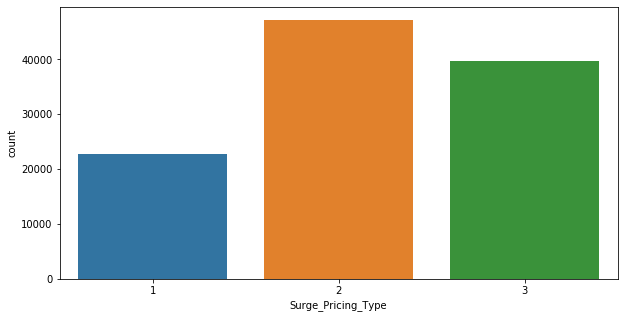

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(df['Surge_Pricing_Type'])
plt.show()

In [11]:
print(df.isnull().sum())

Trip_Distance                      0
Type_of_Cab                    16765
Customer_Since_Months           4903
Life_Style_Index               16850
Confidence_Life_Style_Index    16850
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           59159
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64


In [12]:
#detecting missing values
count = 0
for col in df.columns:
    if df[col].isnull().sum() == 0:
        count+=1
    else:
        print("Missing values found in "+col)

if count==df.shape[1]:
    print("No missing value found in any column")

Missing values found in Type_of_Cab
Missing values found in Customer_Since_Months
Missing values found in Life_Style_Index
Missing values found in Confidence_Life_Style_Index
Missing values found in Var1


In [13]:
#nan values in Type_of_Cab can be considered a new category

In [14]:
df['Type_of_Cab'].unique()

array(['B', nan, 'C', 'E', 'D', 'A'], dtype=object)

In [15]:
df['Type_of_Cab'] = df['Type_of_Cab'].fillna('F')

In [16]:
df['Type_of_Cab'].unique()

array(['B', 'F', 'C', 'E', 'D', 'A'], dtype=object)

In [17]:
#Customer_Since_Months has few nan and we can consider them to be newbies therefore they can be assigned 0 value

In [18]:
df['Customer_Since_Months'].unique()

array([10.,  2.,  3.,  5., nan,  1.,  4.,  0.,  9.,  6.,  7.,  8.])

In [19]:
df['Customer_Since_Months'].fillna(0,inplace=True)

In [20]:
df['Customer_Since_Months'].unique()

array([10.,  2.,  3.,  5.,  0.,  1.,  4.,  9.,  6.,  7.,  8.])

In [21]:
#Life_Style_Index, Confidence_Life_Style_Index are propritery indexes set by the cab company based on customer lifestyle. 
#EDA needs to be performed here.

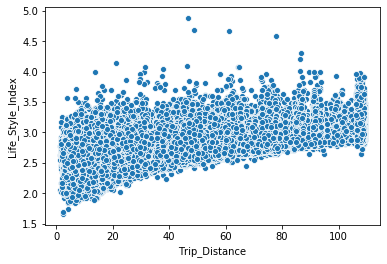

In [22]:
ax = sns.scatterplot(x="Trip_Distance", y="Life_Style_Index", data=df)

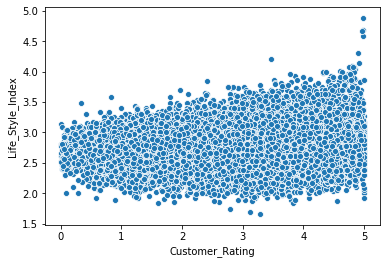

In [23]:
ax = sns.scatterplot(x="Customer_Rating", y="Life_Style_Index", data=df)

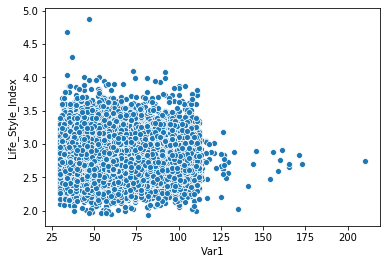

In [24]:
ax = sns.scatterplot(x="Var1", y="Life_Style_Index", data=df)

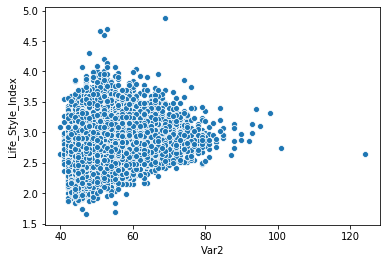

In [25]:
ax = sns.scatterplot(x="Var2", y="Life_Style_Index", data=df)

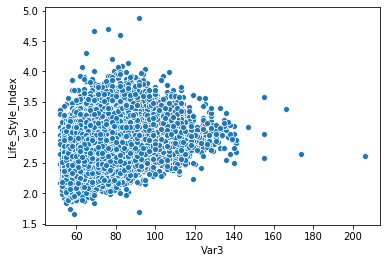

In [26]:
ax = sns.scatterplot(x="Var3", y="Life_Style_Index", data=df)

In [27]:
print(df['Life_Style_Index'].mode())
print(df['Life_Style_Index'].mean())
print(df['Life_Style_Index'].median())

0    2.70697
dtype: float64
2.802270076506393
2.79764


In [28]:
# From the above 3 scatter plots, we can notice that most of the values of Life_style_index is distributed between 2 to 3.5
# For simplicity, we can assume nan values with mean  i.e. 2.8

In [29]:
df['Life_Style_Index'].fillna(2.8, inplace=True)

In [30]:
# Confidence_Life_Style_Index is a category column based on confidence of Life_Style_Index so performing EDA to know relationship btw them

In [31]:
df['Confidence_Life_Style_Index'].unique()

array(['B', nan, 'C', 'A'], dtype=object)

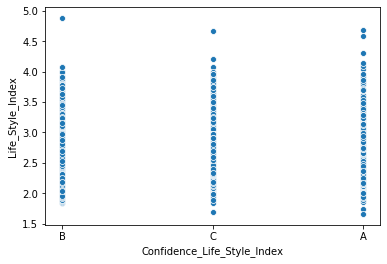

In [32]:
ax = sns.scatterplot(x="Confidence_Life_Style_Index", y="Life_Style_Index", data=df)

In [33]:
import random
df['Confidence_Life_Style_Index'].fillna(value=np.random.choice(['A','B','C']), inplace=True)

In [34]:
df

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
1,41.58,F,10.0,2.80000,B,E,3.50125,2,NaN,56,77,Male,2
2,61.56,C,10.0,2.80000,B,A,3.45375,0,NaN,52,74,Male,3
3,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2
4,19.06,E,10.0,2.80000,B,A,2.59750,1,72.0,63,91,Male,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109517,40.15,E,4.0,2.80000,B,A,2.74625,1,NaN,49,63,Female,3
109518,20.18,F,10.0,2.69374,C,F,4.52625,1,48.0,47,62,Female,3
109519,11.72,D,1.0,2.74229,A,A,3.28500,0,61.0,47,76,Male,3
109520,74.81,C,7.0,2.81059,C,A,0.44500,0,NaN,63,88,Male,2


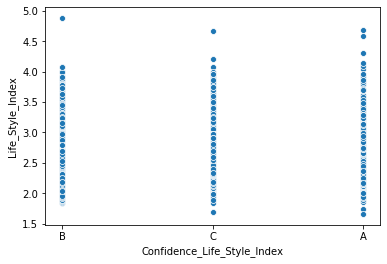

In [35]:
ax = sns.scatterplot(x="Confidence_Life_Style_Index", y="Life_Style_Index", data=df)

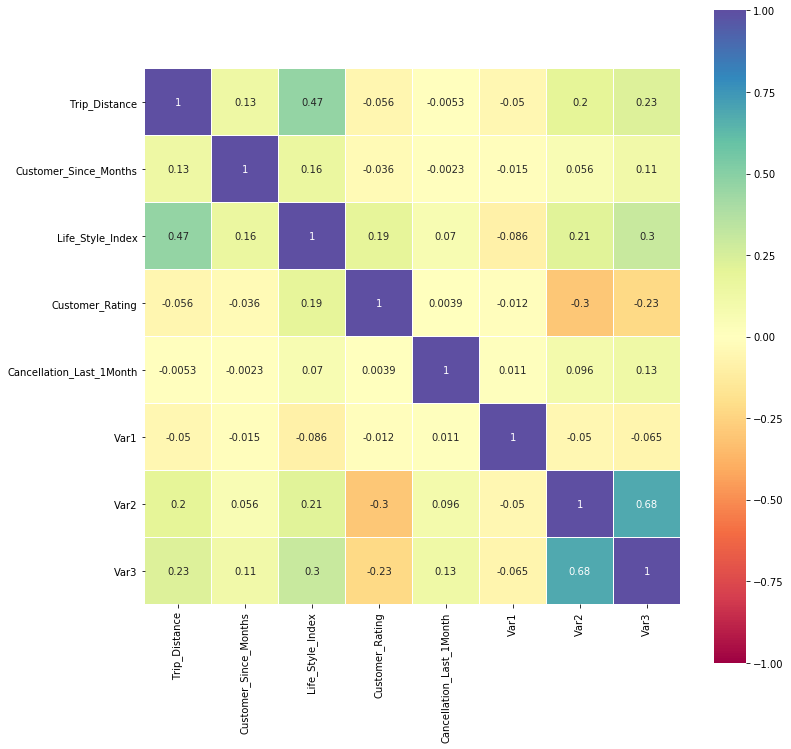

In [36]:
df2 = df.copy()
df2 = df2.drop("Surge_Pricing_Type", axis =1)
# Making correlation coefficients pair plot of all feature in order to identify degenrate features
plt.figure(figsize=(12,12))
ax = plt.axes()
corr = df2.corr()
sns.heatmap(corr, vmax=1,vmin=-1, square=True, annot=True, cmap='Spectral',linecolor="white", linewidths=0.01, ax=ax)
# ax.set_title('Fig. : Correlation Coefficient Pair Plot',fontweight="bold", size=30)
plt.show()

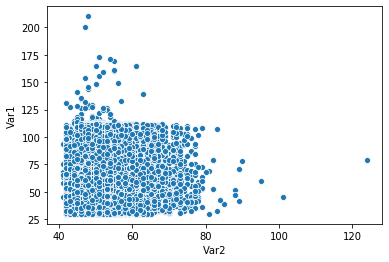

In [37]:
ax = sns.scatterplot(x="Var2", y="Var1", data=df)

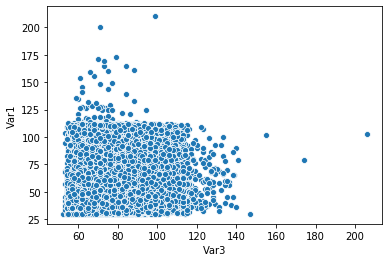

In [38]:
ax = sns.scatterplot(x="Var3", y="Var1", data=df)

In [39]:
print(df['Var1'].mode())
print(df['Var1'].mean())
print(df['Var1'].median())

0    39.0
dtype: float64
64.16925123602645
61.0


In [40]:
# From the above scatter plots, we can notice that most of the values of Var1 is distributed between 25 to 112
# For simplicity, we can assume nan values with mean  i.e. 64

In [41]:
df['Var1'].fillna(64, inplace=True)

In [42]:
df

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
1,41.58,F,10.0,2.80000,B,E,3.50125,2,64.0,56,77,Male,2
2,61.56,C,10.0,2.80000,B,A,3.45375,0,64.0,52,74,Male,3
3,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2
4,19.06,E,10.0,2.80000,B,A,2.59750,1,72.0,63,91,Male,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109517,40.15,E,4.0,2.80000,B,A,2.74625,1,64.0,49,63,Female,3
109518,20.18,F,10.0,2.69374,C,F,4.52625,1,48.0,47,62,Female,3
109519,11.72,D,1.0,2.74229,A,A,3.28500,0,61.0,47,76,Male,3
109520,74.81,C,7.0,2.81059,C,A,0.44500,0,64.0,63,88,Male,2


In [43]:
#detecting missing values
count = 0
for col in df.columns:
    if df[col].isnull().sum() == 0:
        count+=1
    else:
        print("Missing values found in "+col)

if count==df.shape[1]:
    print("No missing value found in any column")

No missing value found in any column


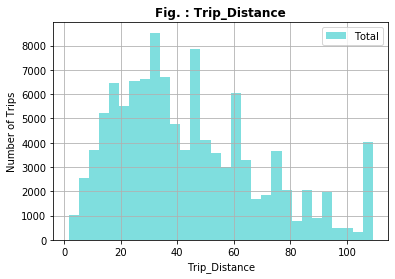

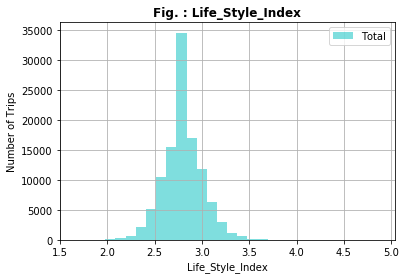

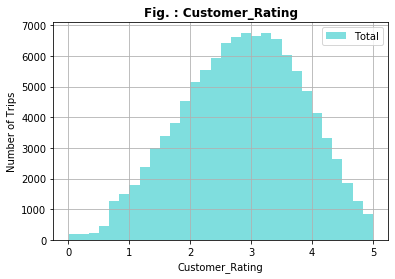

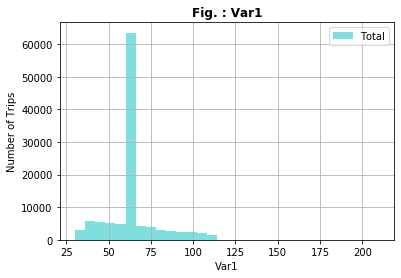

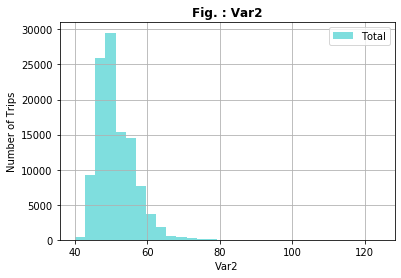

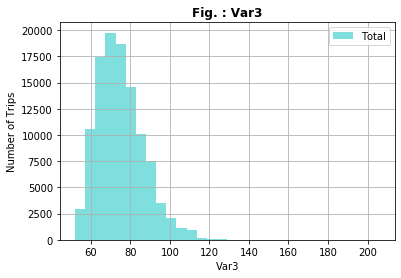

In [44]:
# Credit Limit (Feature name :'LIMIT_BAL' )
%matplotlib inline
cont_df = df[['Trip_Distance','Life_Style_Index','Customer_Rating','Var1','Var2','Var3']]
for col in cont_df.columns:
    bins = 30
    plt.hist(df[col], bins = bins, color='c',label = 'Total',alpha=0.5)
#     plt.hist(df[col][df['Surge_Pricing_Type'] == 1], bins = bins, color='k',label = 'Surge_Price_1')
#     plt.hist(df[col][df['Surge_Pricing_Type'] == 2], bins = bins, color='r',label = 'Surge_Price_2')
#     plt.hist(df[col][df['Surge_Pricing_Type'] == 3], bins = bins, color='y',label = 'Surge_Price_3')

    plt.xlabel(col);plt.ylabel('Number of Trips')
    plt.title('Fig. : '+col,fontweight="bold", size=12)
    plt.legend()
    plt.grid()
    plt.show()

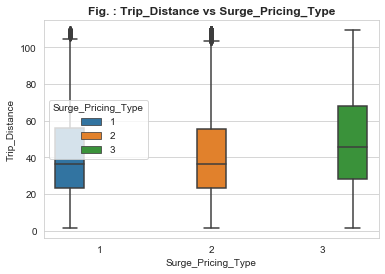

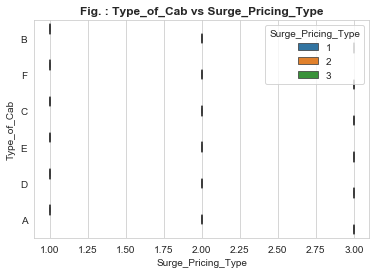

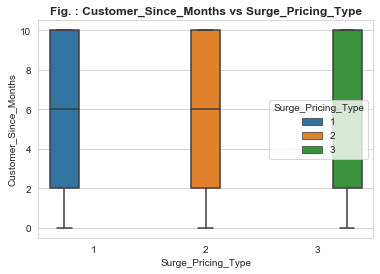

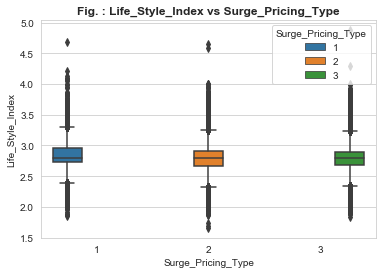

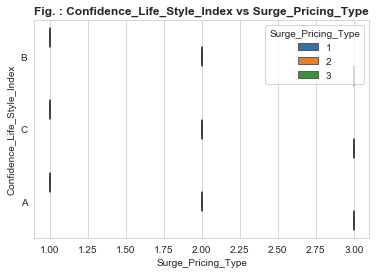

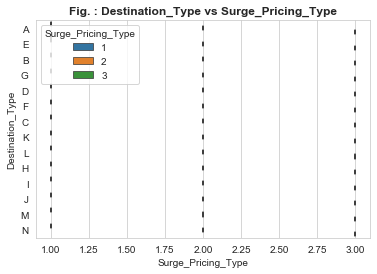

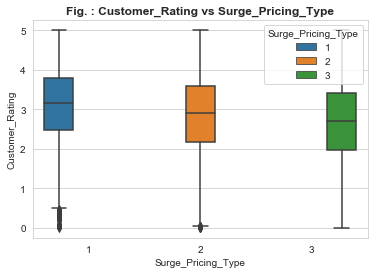

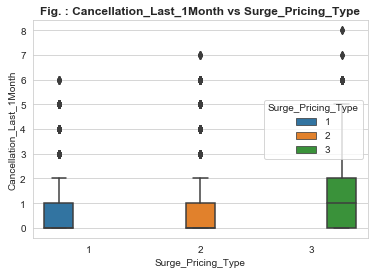

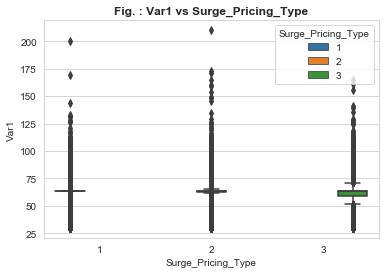

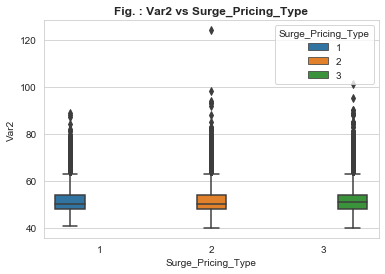

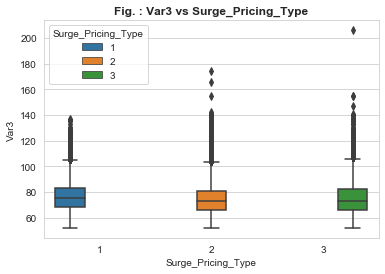

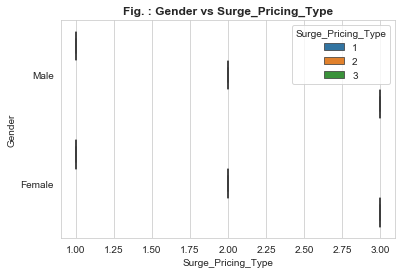

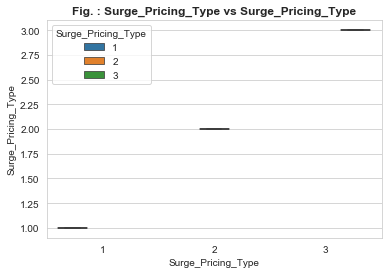

In [45]:
for col in df.columns:
    sns.set_style("whitegrid") 
    sns.boxplot(x = 'Surge_Pricing_Type', y = col, data = df, hue='Surge_Pricing_Type')
#     plt.figure(figsize=(15,15))
    plt.title('Fig. : '+col+' vs Surge_Pricing_Type',fontweight="bold", size=12)
    plt.show()

In [46]:
df = pd.get_dummies(df, columns=['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type', 'Gender'],drop_first=True)

In [47]:
df

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
1,41.58,10.0,2.80000,3.50125,2,64.0,56,77,2,0,...,0,0,0,0,0,0,0,0,0,1
2,61.56,10.0,2.80000,3.45375,0,64.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
3,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1
4,19.06,10.0,2.80000,2.59750,1,72.0,63,91,3,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109517,40.15,4.0,2.80000,2.74625,1,64.0,49,63,3,0,...,0,0,0,0,0,0,0,0,0,0
109518,20.18,10.0,2.69374,4.52625,1,48.0,47,62,3,0,...,1,0,0,0,0,0,0,0,0,0
109519,11.72,1.0,2.74229,3.28500,0,61.0,47,76,3,0,...,0,0,0,0,0,0,0,0,0,1
109520,74.81,7.0,2.81059,0.44500,0,64.0,63,88,2,0,...,0,0,0,0,0,0,0,0,0,1


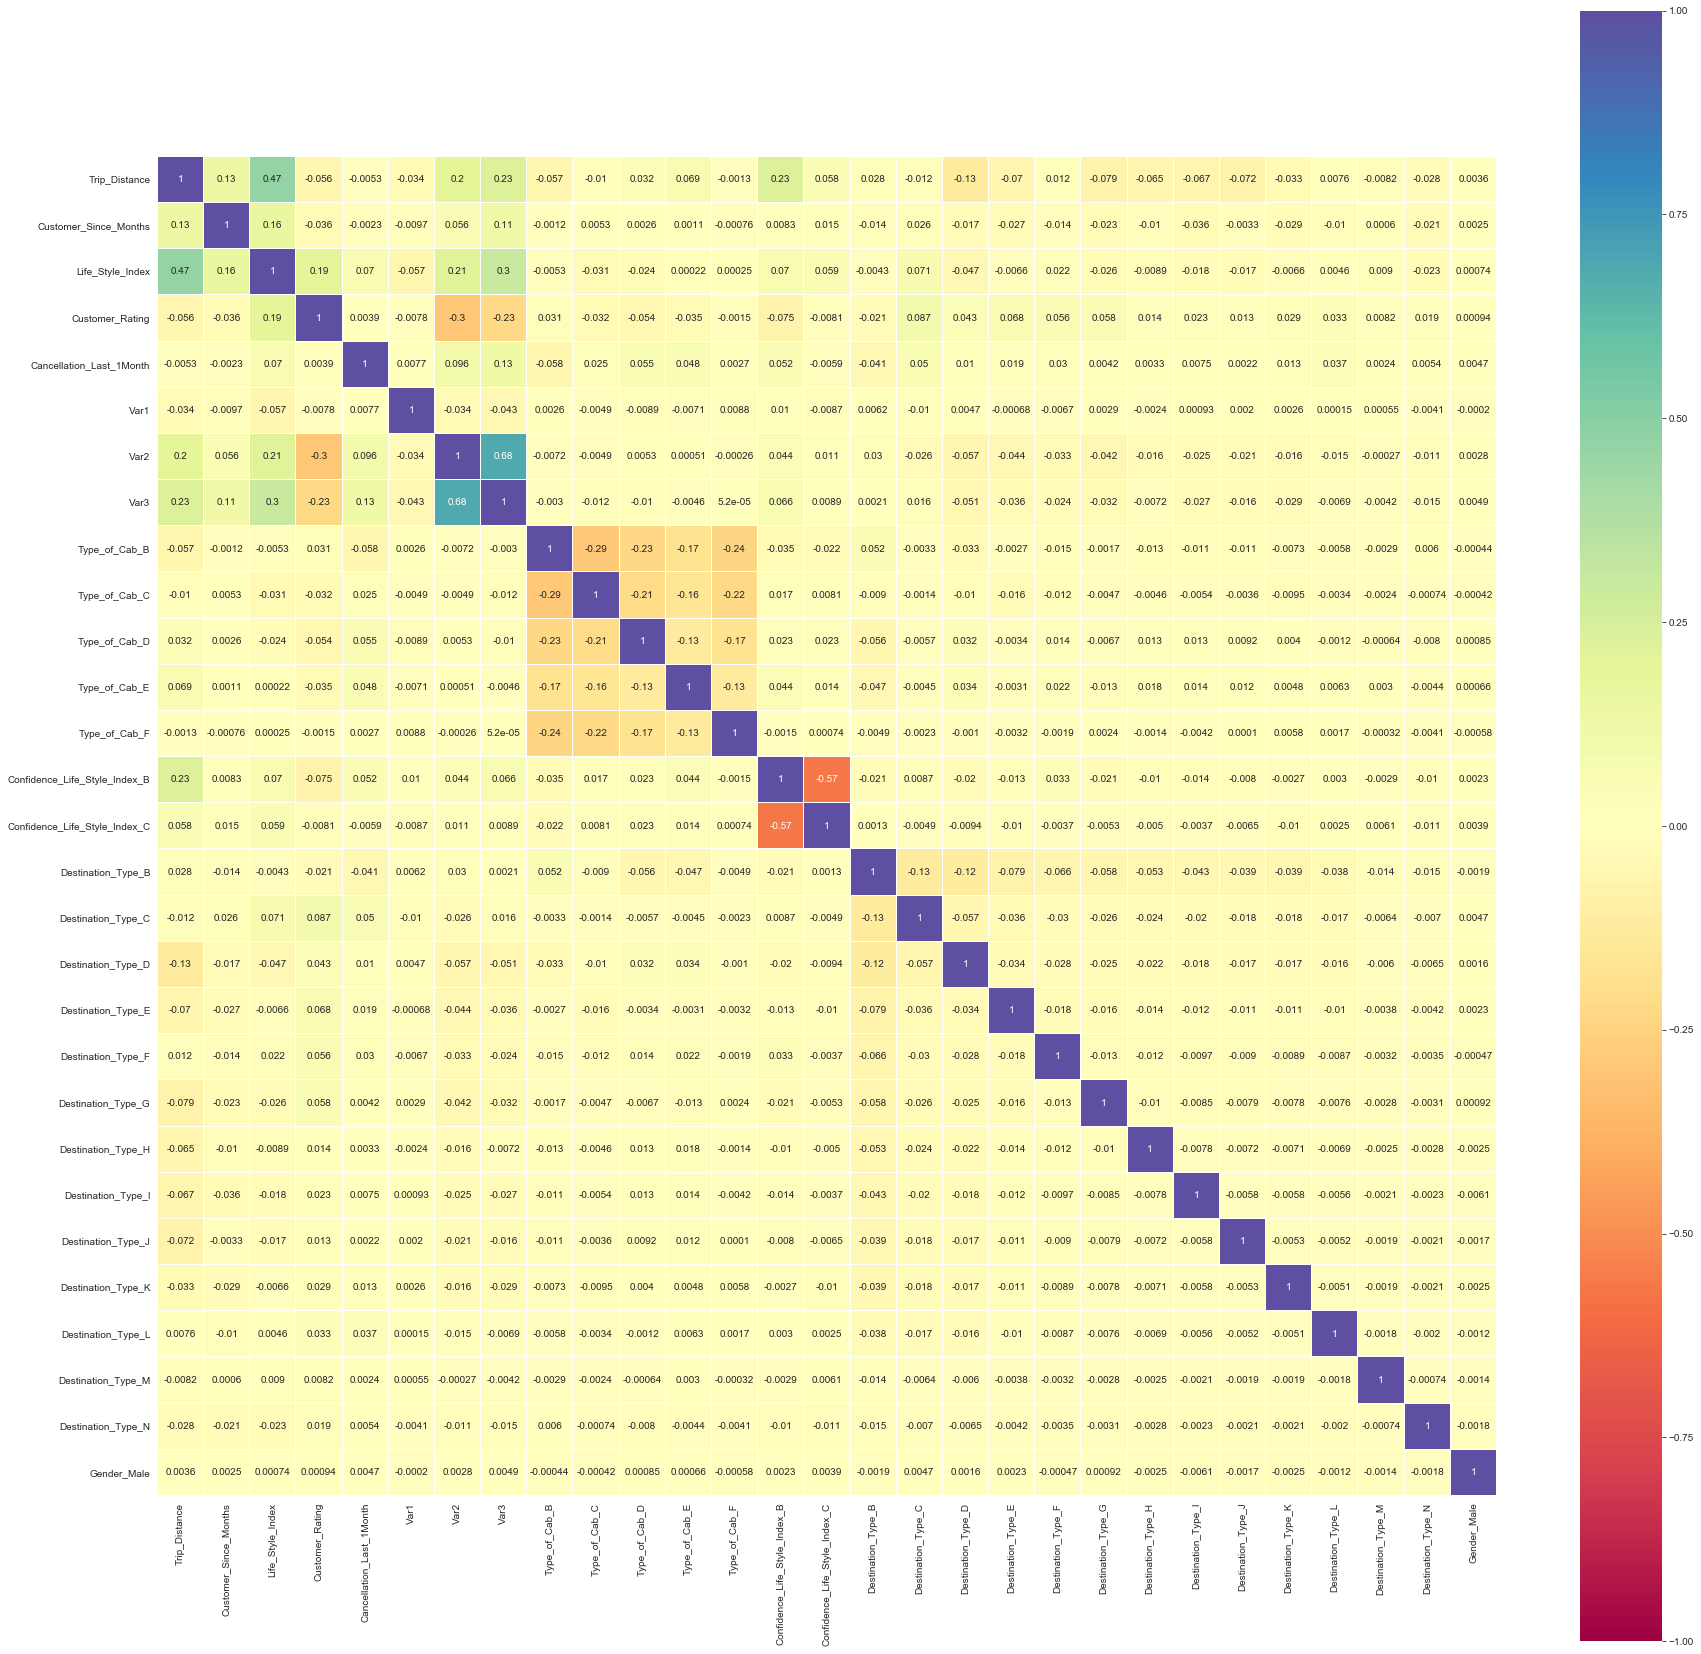

In [48]:
df2 = df.copy()
df2 = df2.drop("Surge_Pricing_Type", axis =1)
# Making correlation coefficients pair plot of all feature in order to identify degenrate features
plt.figure(figsize=(30,30))
ax = plt.axes()
corr = df2.corr()
sns.heatmap(corr, vmax=1,vmin=-1, square=True, annot=True, cmap='Spectral',linecolor="white", linewidths=0.01, ax=ax)
# ax.set_title('Fig. : Correlation Coefficient Pair Plot',fontweight="bold", size=30)
plt.show()

In [49]:
correlated_features = set()

for i in range(len(corr .columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.9:
            colname = corr.columns[i]
            correlated_features.add(colname)
print(correlated_features)

set()


In [50]:
# No correlated features

In [51]:
# cont_df = df[['Trip_Distance','Life_Style_Index','Customer_Rating','Var1','Var2','Var3']]
cont_list = ['Trip_Distance',
 'Customer_Since_Months',
 'Life_Style_Index',
 'Customer_Rating',
 'Cancellation_Last_1Month',
 'Var1',
 'Var2',
 'Var3']

scaled_features = df.copy()

features = scaled_features[cont_list]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features = pd.DataFrame(features, columns = cont_list)

df = df.drop(cont_list,axis=1)
df = pd.concat([df,scaled_features],axis=1)

In [52]:
df

,Surge_Pricing_Type,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Type_of_Cab_F,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_B,Destination_Type_C,...,Destination_Type_N,Gender_Male,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3
0,2,1,0,0,0,0,1,0,0,0,...,0,1,-0.575855,1.131119,-0.093858,0.611516,-0.755252,-1.760957,0.963121,0.251393
1,2,0,0,0,0,1,1,0,0,0,...,0,1,-0.101246,1.131119,-0.009259,0.663699,1.175059,-0.005256,0.963121,0.165056
2,3,0,1,0,0,0,1,0,0,0,...,0,1,0.681800,1.131119,-0.009259,0.615334,-0.755252,-0.005256,0.160469,-0.093955
3,2,0,1,0,0,0,1,0,0,0,...,0,1,0.422744,1.131119,1.121275,0.563151,3.105369,-0.883106,-0.441520,2.323479
4,3,0,0,0,1,0,1,0,0,0,...,0,1,-0.983838,1.131119,-0.009259,-0.256502,0.209903,0.534960,2.367762,1.373773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109517,3,0,0,0,1,0,1,0,0,0,...,0,0,-0.157290,-0.466258,-0.009259,-0.105044,0.209903,-0.005256,-0.441520,-1.043661
109518,3,0,0,0,0,1,0,1,0,0,...,0,0,-0.939944,1.131119,-0.521477,1.707356,0.209903,-1.085687,-0.842846,-1.129998
109519,3,0,0,1,0,0,0,0,0,0,...,0,1,-1.271504,-1.264946,-0.287446,0.443512,-0.755252,-0.207837,-0.842846,0.078719
109520,2,0,1,0,0,0,0,1,0,0,...,0,1,1.201087,0.332431,0.041789,-2.448182,-0.755252,-0.005256,2.367762,1.114762


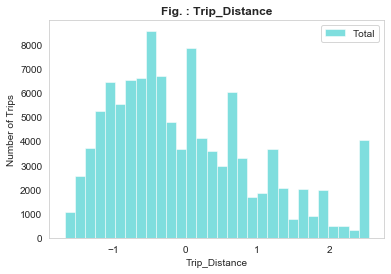

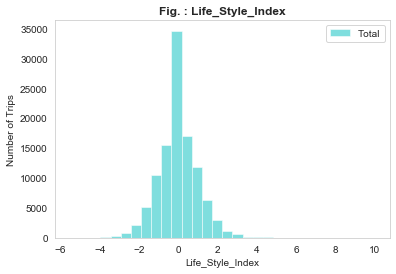

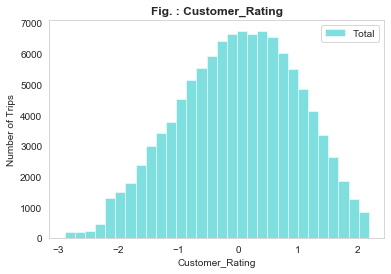

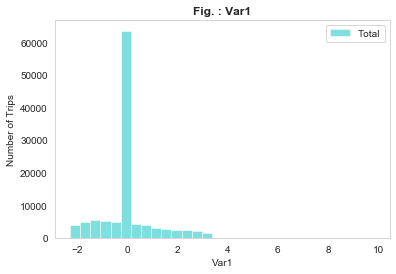

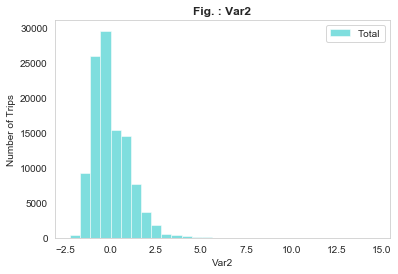

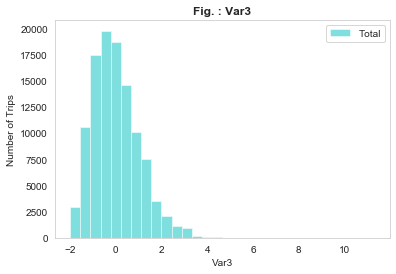

In [53]:
# Credit Limit (Feature name :'LIMIT_BAL' )
%matplotlib inline
cont_df = df[['Trip_Distance','Life_Style_Index','Customer_Rating','Var1','Var2','Var3']]
for col in cont_df.columns:
    bins = 30
    plt.hist(df[col], bins = bins, color='c',label = 'Total',alpha=0.5)
#     plt.hist(df[col][df['Surge_Pricing_Type'] == 1], bins = bins, color='k',label = 'Surge_Price_1')
#     plt.hist(df[col][df['Surge_Pricing_Type'] == 2], bins = bins, color='r',label = 'Surge_Price_2')
#     plt.hist(df[col][df['Surge_Pricing_Type'] == 3], bins = bins, color='y',label = 'Surge_Price_3')

    plt.xlabel(col);plt.ylabel('Number of Trips')
    plt.title('Fig. : '+col,fontweight="bold", size=12)
    plt.legend()
    plt.grid()
    plt.show()

In [54]:
last_col = df.pop('Surge_Pricing_Type')
df.insert(len(df.columns),'Surge_Pricing_Type',last_col)

In [55]:
print(df.columns)
print(len(df.columns))

Index(['Type_of_Cab_B', 'Type_of_Cab_C', 'Type_of_Cab_D', 'Type_of_Cab_E',
       'Type_of_Cab_F', 'Confidence_Life_Style_Index_B',
       'Confidence_Life_Style_Index_C', 'Destination_Type_B',
       'Destination_Type_C', 'Destination_Type_D', 'Destination_Type_E',
       'Destination_Type_F', 'Destination_Type_G', 'Destination_Type_H',
       'Destination_Type_I', 'Destination_Type_J', 'Destination_Type_K',
       'Destination_Type_L', 'Destination_Type_M', 'Destination_Type_N',
       'Gender_Male', 'Trip_Distance', 'Customer_Since_Months',
       'Life_Style_Index', 'Customer_Rating', 'Cancellation_Last_1Month',
       'Var1', 'Var2', 'Var3', 'Surge_Pricing_Type'],
      dtype='object')
30


In [56]:
X = df.iloc[:,:-1]
y = df.Surge_Pricing_Type
print(X.shape)
print(y.shape)

(109522, 29)
(109522,)


In [57]:
# train test split into 70-30
from collections import Counter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)
print(Counter(y_train))
print(Counter(y_test))

Counter({2: 33023, 3: 27760, 1: 15882})
Counter({2: 14153, 3: 11897, 1: 6807})


In [58]:
# checking algorithms

models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    
    #accuracy on the training set
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, round(cv_results.mean()*100,2), cv_results.std()))

/Users/abhilashalodha/anaconda3/envs/tensorflow1/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/abhilashalodha/anaconda3/envs/tensorflow1/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    ht

LR: 69.340000 (0.003386)
DT: 57.230000 (0.003619)
RF: 69.420000 (0.005139)


/Users/abhilashalodha/anaconda3/envs/tensorflow1/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:14:02] WARNING: /private/var/folders/h8/pmsvgr1530gdh47_4mn8ws2c0000gn/T/pip-install-4t5kpv7b/xgboost/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:14:24] WARNING: /private/var/folders/h8/pmsvgr1530gdh47_4mn8ws2c0000gn/T/pip-install-4t5kpv7b/xgboost/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:14:48] WARNING: /private/var/folders/h8/pmsvgr1530gdh47_4mn8ws2c0000gn/T/pip-install-4t5kpv7b/xgboost/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the obje

In [60]:
results

[array([0.69131938, 0.69621079, 0.6924281 , 0.68884106, 0.69823257]),
 array([0.56975152, 0.57575165, 0.57301246, 0.56675145, 0.5762734 ]),
 array([0.6910585 , 0.694189  , 0.6913846 , 0.69034109, 0.70416748]),
 array([0.69934129, 0.70547186, 0.69836301, 0.69842823, 0.70801539])]

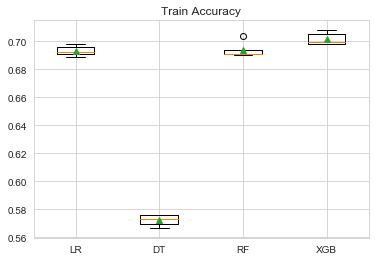

In [59]:
#compare algorithms
from matplotlib import pyplot
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.title('Train Accuracy')
pyplot.show()

LR


/Users/abhilashalodha/anaconda3/envs/tensorflow1/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Feature: 0, Score: -1.35221
Feature: 1, Score: -2.69102
Feature: 2, Score: -2.20891
Feature: 3, Score: -1.89570
Feature: 4, Score: -1.47960
Feature: 5, Score: -0.40860
Feature: 6, Score: -0.26660
Feature: 7, Score: 0.44262
Feature: 8, Score: 0.09699
Feature: 9, Score: -0.45524
Feature: 10, Score: 0.26594
Feature: 11, Score: -0.38769
Feature: 12, Score: 0.39687
Feature: 13, Score: -0.46681
Feature: 14, Score: -0.49301
Feature: 15, Score: -0.31066
Feature: 16, Score: 0.05836
Feature: 17, Score: 0.16416
Feature: 18, Score: -0.15568
Feature: 19, Score: 0.41774
Feature: 20, Score: 0.00434
Feature: 21, Score: -0.24096
Feature: 22, Score: -0.04498
Feature: 23, Score: 0.20192
Feature: 24, Score: 0.22553
Feature: 25, Score: -0.32264
Feature: 26, Score: 0.05628
Feature: 27, Score: -0.01360
Feature: 28, Score: 0.19631


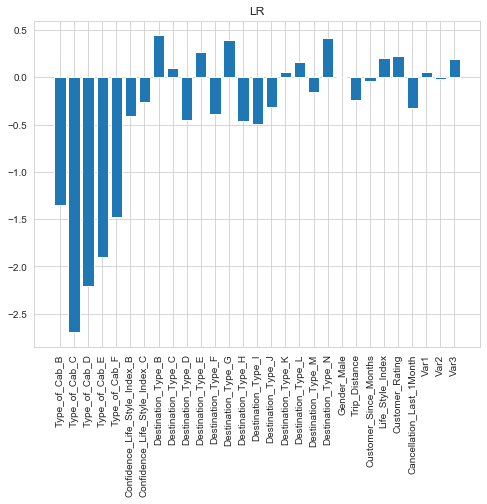

68.86
[[ 3771  2198   838]
 [  678 10976  2499]
 [  670  3349  7878]]
              precision    recall  f1-score   support

           1       0.74      0.55      0.63      6807
           2       0.66      0.78      0.72     14153
           3       0.70      0.66      0.68     11897

    accuracy                           0.69     32857
   macro avg       0.70      0.66      0.68     32857
weighted avg       0.69      0.69      0.69     32857



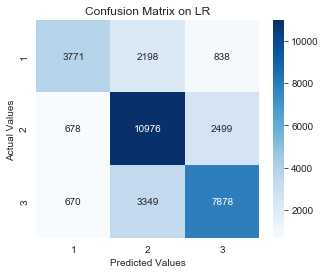

DT
Trip_Distance : 13.35%
Customer_Rating : 12.01%
Life_Style_Index : 10.99%
Type_of_Cab_B : 9.65%
Var3 : 8.26%
Var2 : 6.32%
Type_of_Cab_C : 5.95%
Var1 : 5.95%
Type_of_Cab_D : 5.01%
Customer_Since_Months : 4.9%
Type_of_Cab_F : 4.5%
Type_of_Cab_E : 3.52%
Cancellation_Last_1Month : 2.44%
Gender_Male : 1.31%
Destination_Type_B : 1.2%
Confidence_Life_Style_Index_B : 1.18%
Confidence_Life_Style_Index_C : 0.83%
Destination_Type_D : 0.61%
Destination_Type_C : 0.48%
Destination_Type_E : 0.29%
Destination_Type_F : 0.29%
Destination_Type_G : 0.22%
Destination_Type_H : 0.17%
Destination_Type_I : 0.15%
Destination_Type_L : 0.15%
Destination_Type_K : 0.13%
Destination_Type_J : 0.12%
Destination_Type_M : 0.02%
Destination_Type_N : 0.01%


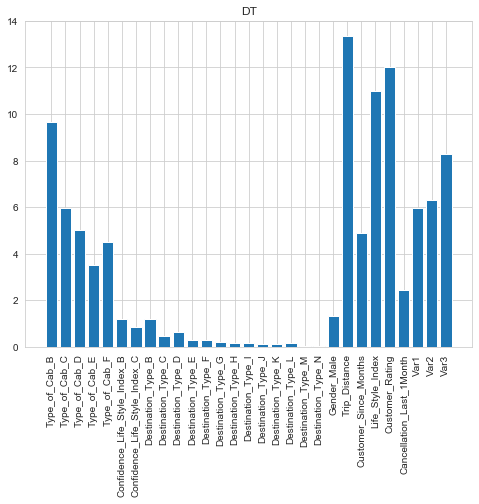

57.6
[[3509 2045 1253]
 [2200 8368 3585]
 [1226 3624 7047]]
              precision    recall  f1-score   support

           1       0.51      0.52      0.51      6807
           2       0.60      0.59      0.59     14153
           3       0.59      0.59      0.59     11897

    accuracy                           0.58     32857
   macro avg       0.57      0.57      0.57     32857
weighted avg       0.58      0.58      0.58     32857



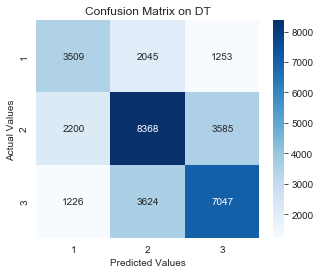

RF
Trip_Distance : 12.14%
Customer_Rating : 11.38%
Life_Style_Index : 10.2%
Var3 : 9.03%
Type_of_Cab_B : 8.99%
Var2 : 7.45%
Type_of_Cab_D : 7.1%
Var1 : 6.22%
Customer_Since_Months : 5.56%
Type_of_Cab_C : 4.95%
Cancellation_Last_1Month : 3.35%
Type_of_Cab_E : 2.98%
Type_of_Cab_F : 2.55%
Gender_Male : 1.59%
Confidence_Life_Style_Index_B : 1.29%
Destination_Type_B : 1.27%
Confidence_Life_Style_Index_C : 1.04%
Destination_Type_C : 0.64%
Destination_Type_D : 0.62%
Destination_Type_E : 0.34%
Destination_Type_F : 0.28%
Destination_Type_G : 0.23%
Destination_Type_H : 0.21%
Destination_Type_I : 0.15%
Destination_Type_L : 0.15%
Destination_Type_J : 0.14%
Destination_Type_K : 0.14%
Destination_Type_M : 0.03%
Destination_Type_N : 0.02%


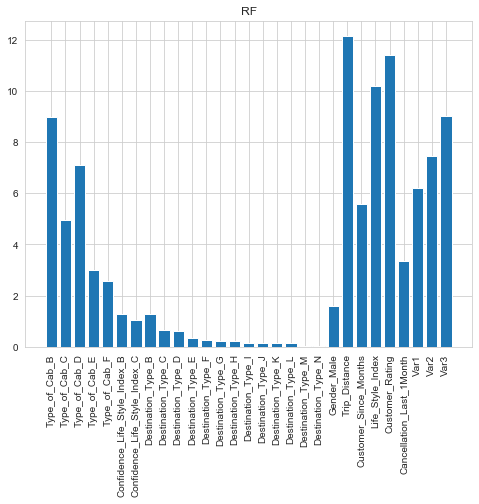

69.37
[[ 3877  2036   894]
 [  768 10891  2494]
 [  596  3277  8024]]
              precision    recall  f1-score   support

           1       0.74      0.57      0.64      6807
           2       0.67      0.77      0.72     14153
           3       0.70      0.67      0.69     11897

    accuracy                           0.69     32857
   macro avg       0.70      0.67      0.68     32857
weighted avg       0.70      0.69      0.69     32857



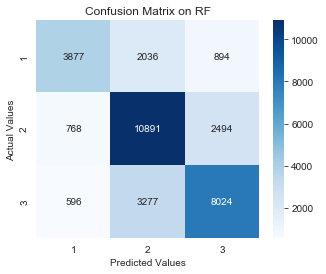

XGB


/Users/abhilashalodha/anaconda3/envs/tensorflow1/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:16:55] WARNING: /private/var/folders/h8/pmsvgr1530gdh47_4mn8ws2c0000gn/T/pip-install-4t5kpv7b/xgboost/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Type_of_Cab_B : 19.86%
Type_of_Cab_D : 19.4%
Type_of_Cab_F : 16.31%
Type_of_Cab_E : 15.7%
Type_of_Cab_C : 11.56%
Confidence_Life_Style_Index_B : 2.12%
Cancellation_Last_1Month : 1.75%
Destination_Type_B : 1.44%
Destination_Type_D : 1.37%
Confidence_Life_Style_Index_C : 1.11%
Destination_Type_H : 0.78%
Destination_Type_F : 0.73%
Destination_Type_I : 0.73%
Trip_Distance : 0.67%
Var1 : 0.63%
Destination_Type_G : 0.58%
Destination_Type_E : 0.53%
Customer_Rating : 0.53%
Var3 : 0.52%
Life_Style_Index : 0.49%
Destination_Type_J : 0.48%
Destination_Type_C : 0.46%
Destination_Type_L : 0.42%
Destination_Type_K : 0.36%
Var2 :

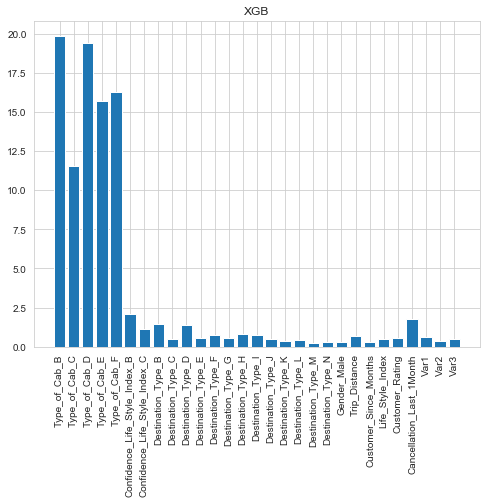

69.98
[[ 3903  2138   766]
 [  774 10988  2391]
 [  556  3239  8102]]
              precision    recall  f1-score   support

           1       0.75      0.57      0.65      6807
           2       0.67      0.78      0.72     14153
           3       0.72      0.68      0.70     11897

    accuracy                           0.70     32857
   macro avg       0.71      0.68      0.69     32857
weighted avg       0.70      0.70      0.70     32857



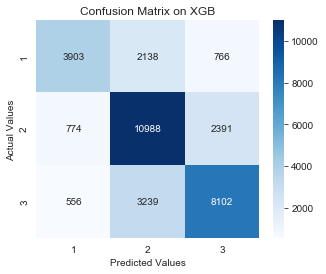

In [61]:
for name,model in models:
    print(name)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    # feature significance
    if name=='LR':
        importance = model.coef_[0]
        for i,v in enumerate(importance):
            print('Feature: %0d, Score: %.5f' % (i,v))
        # plot feature importance
        plt.figure(figsize=(8,6))
        pyplot.bar([x for x in X_train.columns], importance)
        plt.title(name)
        plt.xticks(rotation='vertical')
        pyplot.show()
        
    else:   
        importance = model.feature_importances_	
        imp = [round(ele*100,2) for ele in importance]
        result = dict(zip(X_train.columns, imp))
        feature_dict = {k: v for k, v in sorted(result.items(), key=lambda item: item[1], reverse=True)}
        for key,value in feature_dict.items():
            print("{} : {}%".format(key,value))
        # plot feature importance
        plt.figure(figsize=(8,6))
        pyplot.bar([x for x in X_train.columns], imp)        
        plt.title(name)
        plt.xticks(rotation='vertical')
        pyplot.show()

    # evaluating predictions on validation data
    print(round(accuracy_score(y_test, y_pred)*100,2))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Creating  a confusion matrix,which compares the y_test and y_pred
    cm = confusion_matrix(y_test, y_pred)
    # Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
    cm_df = pd.DataFrame(cm,
                         index = ['1','2','3'], 
                         columns = ['1','2','3'])
    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True,cmap='Blues',fmt='g')
    plt.title('Confusion Matrix on '+name)
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()


In [62]:
#XGB proves outt to be the best model among the 4. So now I'll tune the hyperparameters of XGB to enhance accuracies

In [63]:
# checking algorithms

models = []
models.append(('XGB', XGBClassifier(objective = "multi:softmax", booster = "gbtree", nthread = 4, silent = 1,
                eta = 0.08, max_depth = 6, subsample = 0.9, colsample_bytree = 0.7,
                min_child_weight = 1, num_class = 3,
                seed = 2016, tree_method = "exact")))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    
    #accuracy on the training set
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, round(cv_results.mean()*100,2), cv_results.std()))

/Users/abhilashalodha/anaconda3/envs/tensorflow1/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:17:51] WARNING: /private/var/folders/h8/pmsvgr1530gdh47_4mn8ws2c0000gn/T/pip-install-4t5kpv7b/xgboost/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:17:51] WARNING: /private/var/folders/h8/pmsvgr1530gdh47_4mn8ws2c0000gn/T/pip-install-4t5kpv7b/xgboost/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:18:11] WARNING: /private/var/folders/h8/pmsvgr1530gdh47_4mn8ws2c0000gn/T/pip-install-4t5kpv7b/xgboost/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:573: 


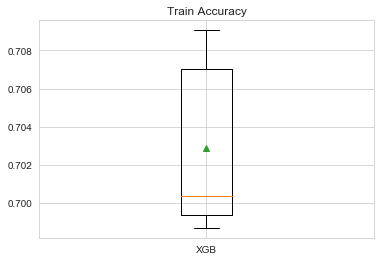

In [64]:
#compare algorithms
from matplotlib import pyplot
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.title('Train Accuracy')
pyplot.show()

XGB
[22:19:37] WARNING: /private/var/folders/h8/pmsvgr1530gdh47_4mn8ws2c0000gn/T/pip-install-4t5kpv7b/xgboost/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/Users/abhilashalodha/anaconda3/envs/tensorflow1/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:19:37] WARNING: /private/var/folders/h8/pmsvgr1530gdh47_4mn8ws2c0000gn/T/pip-install-4t5kpv7b/xgboost/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Type_of_Cab_B : 26.85%
Type_of_Cab_D : 24.7%
Type_of_Cab_E : 13.61%
Type_of_Cab_C : 13.17%
Type_of_Cab_F : 9.38%
Cancellation_Last_1Month : 1.6%
Confidence_Life_Style_Index_B : 1.57%
Destination_Type_B : 1.21%
Confidence_Life_Style_Index_C : 1.0%
Destination_Type_D : 0.86%
Trip_Distance : 0.62%
Var1 : 0.53%
Destination_Type_F : 0.47%
Customer_Rating : 0.44%
Destination_Type_H : 0.43%
Life_Style_Index : 0.42%
Var3 : 0.42%
Destination_Type_I : 0.41%
Destination_Type_J : 0.27%
Destination_Type_E : 0.26%
Destination_Type_G : 0.26%
Destination_Type_C : 0.25%
Destination_Type_L : 0.21%
Destination_Type_N : 0.21%
Var2 : 0

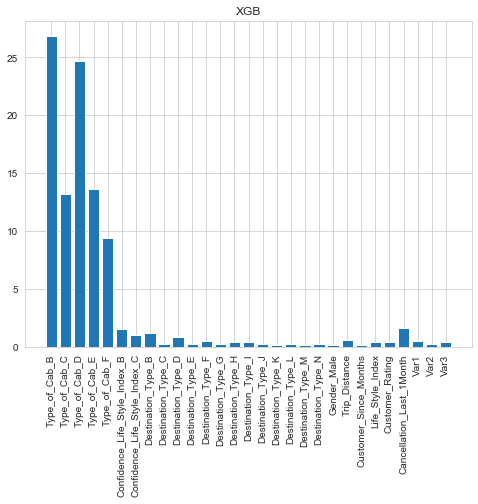

70.07
[[ 3828  2202   777]
 [  657 11257  2239]
 [  580  3380  7937]]
              precision    recall  f1-score   support

           1       0.76      0.56      0.64      6807
           2       0.67      0.80      0.73     14153
           3       0.72      0.67      0.69     11897

    accuracy                           0.70     32857
   macro avg       0.72      0.67      0.69     32857
weighted avg       0.71      0.70      0.70     32857



In [65]:
for name,model in models:
    print(name)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    # feature significance
    if name=='LR':
        importance = model.coef_[0]
        for i,v in enumerate(importance):
            print('Feature: %0d, Score: %.5f' % (i,v))
        # plot feature importance
        plt.figure(figsize=(8,6))
        pyplot.bar([x for x in X_train.columns], importance)
        plt.title(name)
        plt.xticks(rotation='vertical')
        pyplot.show()
        
    else:   
        importance = model.feature_importances_	
        imp = [round(ele*100,2) for ele in importance]
        result = dict(zip(X_train.columns, imp))
        feature_dict = {k: v for k, v in sorted(result.items(), key=lambda item: item[1], reverse=True)}
        for key,value in feature_dict.items():
            print("{} : {}%".format(key,value))
        # plot feature importance
        plt.figure(figsize=(8,6))
        pyplot.bar([x for x in X_train.columns], imp)        
        plt.title(name)
        plt.xticks(rotation='vertical')
        pyplot.show()

    # evaluating predictions on validation data
    print(round(accuracy_score(y_test, y_pred)*100,2))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    


In [66]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

In [67]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['1','2','3'], 
                     columns = ['1','2','3'])

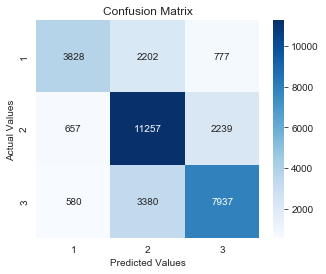

In [68]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,cmap='Blues',fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [73]:
full_df_with_predictions = X_test
full_df_with_predictions['y_test'] = y_test
full_df_with_predictions['y_pred'] = y_pred
full_df_with_predictions

/Users/abhilashalodha/anaconda3/envs/tensorflow1/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/abhilashalodha/anaconda3/envs/tensorflow1/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Type_of_Cab_F,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_B,Destination_Type_C,Destination_Type_D,...,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,y_test,y_pred
101147,1,0,0,0,0,0,1,0,0,0,...,-0.533136,0.332431,3.248093,0.551696,5.035680,2.830878,0.561795,0.683077,1,2
36790,1,0,0,0,0,1,0,0,0,0,...,-1.171957,-1.531175,-0.009259,-0.465233,1.175059,-0.005256,-1.444835,-1.216335,3,2
60443,0,1,0,0,0,1,0,0,0,0,...,-0.645616,-0.998717,-0.009259,-0.162318,-0.755252,-2.301173,-0.441520,0.078719,2,2
102694,0,0,0,0,0,0,0,1,0,0,...,0.001044,1.131119,0.939738,1.021342,-0.755252,-0.005256,-0.240857,-0.352966,1,1
62112,0,0,1,0,0,0,1,0,0,0,...,-0.784354,1.131119,-0.281951,-0.204319,-0.755252,-1.896011,0.361132,0.337730,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19612,1,0,0,0,0,0,1,0,0,0,...,-1.075154,-0.732487,-0.696941,0.995887,0.209903,-0.342891,-0.040194,-0.352966,2,2
78436,1,0,0,0,0,1,0,0,0,0,...,-0.883508,-0.200028,-0.996867,-0.555599,-0.755252,2.763351,-0.441520,0.337730,2,2
8387,0,0,0,0,0,0,1,0,0,0,...,0.951437,1.131119,0.743257,-0.293412,-0.755252,-0.005256,0.160469,1.201099,1,1
103190,0,1,0,0,0,1,0,0,0,0,...,1.404882,-0.998717,-0.292796,-0.559417,-0.755252,-0.005256,0.963121,0.510403,2,3


In [ ]:
full_df_with_predictions.to_csv("full_df_with_predictions.csv",index=False)